<h1>Music Recommendation System</h1>

<h3>Importing essential libraries</h3>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

<h3 color : "red">Importing and Reading the dataset</h3>

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.shape

(114000, 21)

In [6]:
df.info

<bound method DataFrame.info of         Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1    

<h3 color = "blue">Performing EDA on the dataset</h3>

In [7]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

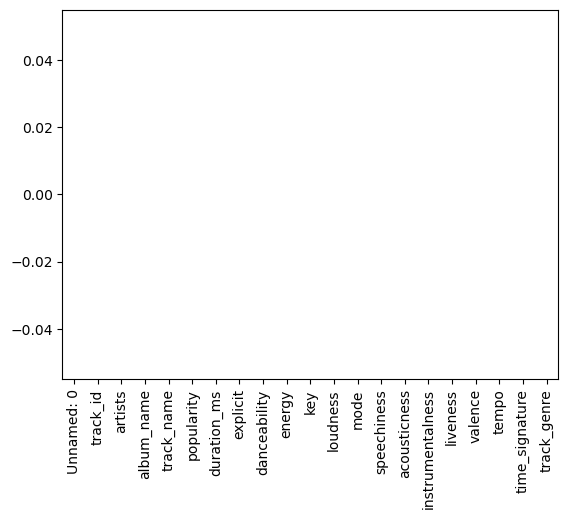

In [8]:
df.dropna(inplace = True)
df.isnull().sum().plot.bar()
plt.show()

In [9]:
df = df.drop(['track_id'], axis = 1)

<h3>Using Dimensionality Reduction Technique</h3>

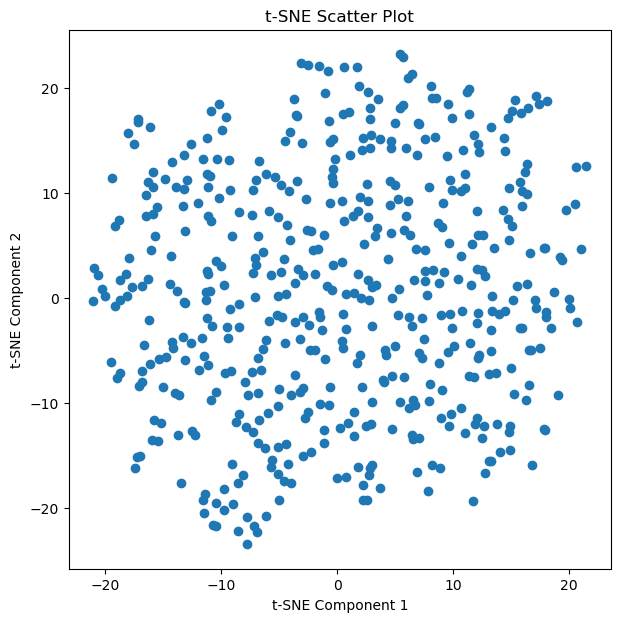

In [10]:
a = pd.DataFrame(np.random.rand(1000, 10))

# t-SNE model and transformation
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(a.head(500))

# Plotting the t-SNE transformed data
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.title("t-SNE Scatter Plot")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [11]:
df['track_name'].nunique()

73608

In [12]:
df.shape

(113999, 20)

In [13]:
df = df.sort_values(by=['popularity'], ascending=False)
df.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

In [15]:
floats = []
for col in df.columns:
  if df[col].dtype == 'float':
    floats.append(col)
 
len(floats)

9

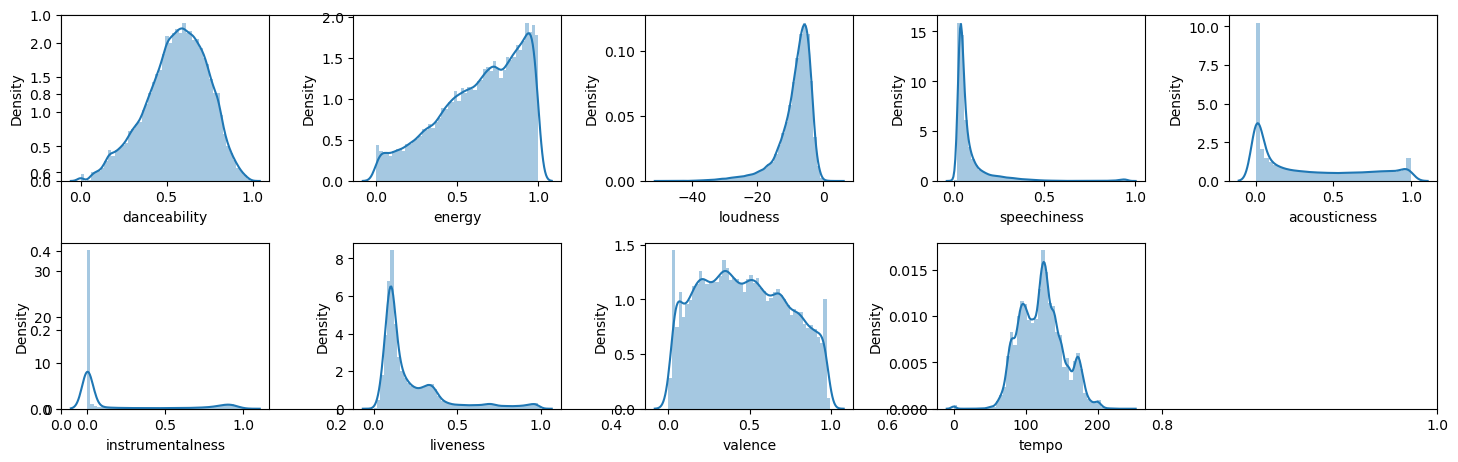

In [17]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [18]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(df['track_genre'])

In [19]:
df = df.sort_values(by=['popularity'], ascending=False).head(10000)

In [22]:
def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['track_genre']).toarray()
  num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['track_name']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['track_name']==name]['track_genre']).toarray()
    num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [23]:
def recommend_songs(song_name, data=df):
  # Base case
  if df[df['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['track_name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artists']][2:7])

<u><i><b><h3>Output</h3></b></i></u>

In [29]:
recommend_songs('Kesariya')

,track_name,artists
55149,"Ae Dil Hai Mushkil Title Track (From ""Ae Dil H...",Pritam;Arijit Singh
55072,Ae Dil Hai Mushkil Title Track,Pritam;Arijit Singh
55118,Kabira (Encore),Pritam;Harshdeep Kaur;Arijit Singh
55286,Ainvayi Ainvayi,Salim–Sulaiman;Sunidhi Chauhan;Amitabh Bhattac...
55152,Kyon,Pritam;Papon;Sunidhi Chauhan
